In [17]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [19]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Converting categorical variables(like the sex, smoker and region columns) into numerical variable using one-hot encoding. We'll use the `get_dummies()` method in pandas.

In [20]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Splitting our data into X and y

In [21]:
X=insurance_one_hot.drop('charges',axis=1)
y=insurance_one_hot['charges']

In [22]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [24]:
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])
history=insurance_model.fit(X_train,y_train,epochs=100,verbose=0)

In [25]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7426.9165 - mae: 7426.9165


[7426.91650390625, 7426.91650390625]

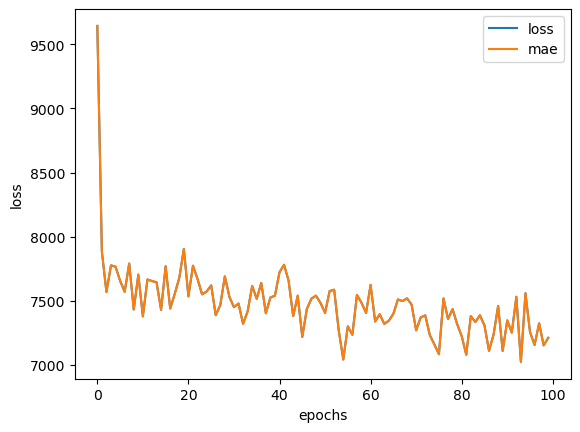

In [26]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [27]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

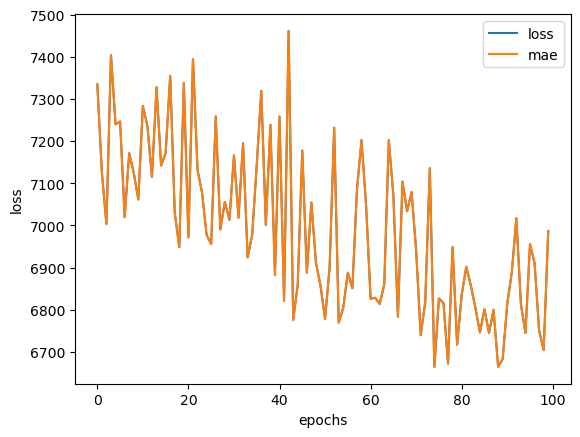

In [28]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Try 3 things:
* Increase the number of layers (2->3)
* Increase the number of units in each layer(except the output layer)
* Change the optimizer(from SGD to Adam)

In [32]:
tf.random.set_seed(42)
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])
history=insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [33]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4658.1313 - mae: 4658.1313


[4658.13134765625, 4658.13134765625]

Text(0.5, 0, 'epochs')

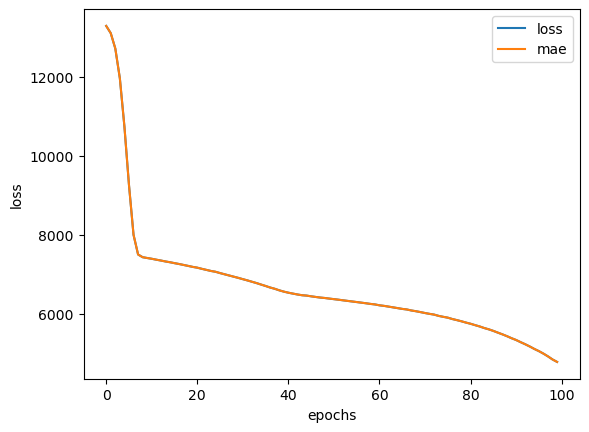

In [34]:
# Plot the loss curve of our model
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [35]:
history_2=insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [36]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 3488.0083 - mae: 3488.0083


(3488.00830078125, 3488.00830078125)

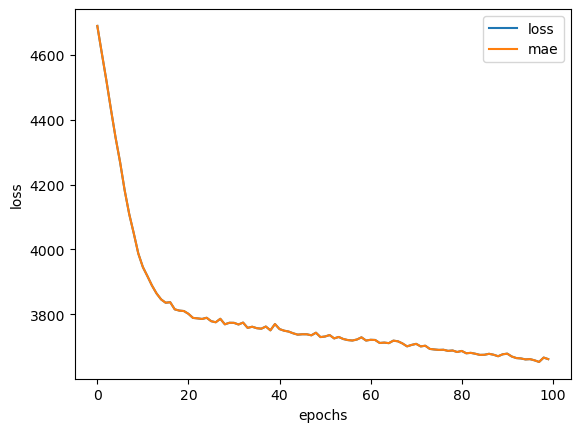

In [37]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

### Preprocessing data(normalization and standardization)

- When working with neural networks make sure all of the data we pass to them is in the range of 0 to 1.
This practice is called **normalization**.(scaling all values from their original range to, eg. between 0 and 100,000 to be between 0 and 1).

- There is another process called **standardization** which converts all our data to unit variance and 0 mean.

- These two practices are often part of a preprocessing pipeline (a series of functions to prepare our data for use with neural networks).


* Turning all our data to numbers ( a neural network can handle strings).
* Making sure our data is in the right shape(verifying input and output shapes).
* Feature Scaling
    * Normalizing data - making sure all values are between 0 and 1. This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
    * Standardization - making sure all values have a mean of 0 and a variance 1. This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
* With neural networks we'll tend to favor normalization as they tend to prefer values between 0 and 1, however, we'll often find a neural network can perform pretty well with minimal feature scaling.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [39]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We need to transform the non-numerical columns into numerical numbers and this time we'll also be normalizing the numerical columns with different ranges(to make sure they're all between 0 and 1).

* `make_column_transformer`-build a multi-step data preprocessing function for the following transformations:
    * `MinMaxScaler`-make sure all numerical columns are normalized(between 0 and 1).
    * `OneHotEncoder`-one hot encode the non-numerical columns.

In [40]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [42]:
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

X=insurance.drop("charges",axis=1)
y=insurance["charges"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

ct.fit(X_train)
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [43]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [44]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [45]:
X_train_normal.shape,X_train.shape

((1070, 11), (1070, 6))

In [53]:
tf.random.set_seed(42)
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [54]:
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

In [58]:
insurance_model_3.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [59]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3166.3457 - mae: 3166.3457


In [57]:
insurance_model_3_mae, insurance_model_2_mae

(3169.856689453125, 3488.00830078125)

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

This is **one of the main benefits of normalization: faster convergence time** (a fancy way of saying, your model gets to better results faster).

`insurance_model_2` may have eventually achieved the same results as `insurance_model_3` if we left it training for longer. 

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practitioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.